# Terrorism

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

### Preprocessing

In [2]:
terror=pd.read_csv('terrorismData.csv')
terror

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms
181687,2017,12,31,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives
181688,2017,12,31,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary
181689,2017,12,31,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives


Loaded the dataset.

In [3]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181257 non-null  object 
 7   Latitude     177135 non-null  float64
 8   Longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


We see there are many columns with null values.

In [4]:
terror=terror.fillna({"Target":'Unknown','Summary':'Unknown','Region':'Unknown','City':'Unknown'})

In [5]:
terror=terror.fillna({'Latitude':terror['Latitude'].mean(),'Longitude':terror['Longitude'].mean(),'Killed':terror['Killed'].mean(),'Wounded':terror['Wounded'].mean()})

In [6]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   State        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   City         181691 non-null  object 
 7   Latitude     181691 non-null  float64
 8   Longitude    181691 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       181691 non-null  float64
 11  Wounded      181691 non-null  float64
 12  Target       181691 non-null  object 
 13  Summary      181691 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 23.6+ MB


Filled the NA values.

In [7]:
terror[terror.duplicated()==True]

,Year,Month,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type
68,1970,2,16,United States,California,North America,Berkeley,37.874043,-122.280022,Bombing/Explosion,0.0,0.0,department store,Unknown,Unknown,Business,Explosives
88,1970,2,23,United States,Nebraska,North America,South Sioux City,42.470310,-96.413949,Bombing/Explosion,0.0,0.0,Power Transmission Pole in the Dakota City/Sio...,"2/23/1970: In a series of related attacks, unk...",Strikers,Utilities,Explosives
89,1970,2,23,United States,Nebraska,North America,South Sioux City,42.470310,-96.413949,Bombing/Explosion,0.0,0.0,Power Transmission Pole in the Dakota City/Sio...,"2/23/1970: In a series of related attacks, unk...",Strikers,Utilities,Explosives
90,1970,2,23,United States,Nebraska,North America,South Sioux City,42.470310,-96.413949,Bombing/Explosion,0.0,0.0,Power Transmission Pole in the Dakota City/Sio...,"2/23/1970: In a series of related attacks, unk...",Strikers,Utilities,Explosives
337,1970,6,9,Jordan,Amman,Middle East & North Africa,Amman,31.950001,35.933331,Hostage Taking (Barricade Incident),0.0,0.0,Hotels,Unknown,Popular Front for the Liberation of Palestine ...,Business,Firearms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181397,2017,12,18,Pakistan,Balochistan,South Asia,Mangoli,28.466810,68.274078,Bombing/Explosion,0.0,0.0,Electricity Tower,12/18/2017: An explosive device detonated near...,Baloch Republican Army (BRA),Utilities,Explosives
181431,2017,12,20,Philippines,Maguindanao,Southeast Asia,Tamontaka,7.172751,124.229664,Bombing/Explosion,0.0,0.0,Checkpoint,12/20/2017: Assailants threw a grenade at a mi...,Bangsamoro Islamic Freedom Movement (BIFM),Military,Explosives
181587,2017,12,27,India,Chhattisgarh,South Asia,Basaguda,18.561113,80.920395,Bombing/Explosion,0.0,0.0,Unknown,"12/00/2017: Sometime between December 24, 2017...",Unknown,Unknown,Explosives
181634,2017,12,29,Israel,Southern,Middle East & North Africa,Unknown,31.506981,34.718904,Bombing/Explosion,0.0,0.0,Unknown,12/29/2017: Assailants in Gaza fired a rocket ...,Unknown,Unknown,Explosives


Many columns are duplicated.

In [8]:
terror=terror.drop_duplicates()

In [9]:
terror=terror.reset_index()

In [10]:
terror=terror.drop(columns=['index'])

Dropped the duplicates and resetted the indexing.

In [11]:
for i in range(len(terror.Month)):
    if terror.Month[i]==0:
        terror.Month[i]=1
for i in range(len(terror.Day)):
    if terror.Day[i]==0:
        terror.Day[i]=1

C:\Users\Aviral.HP-PAVILION\anaconda3\envs\Deep learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aviral.HP-PAVILION\anaconda3\envs\Deep learning\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Many entries in 'Month' and 'Day' were observed to be 0 which isn't correct and hence we change it to 1.

In [12]:
terror["Date"]=pd.to_datetime(terror.iloc[:,:3],infer_datetime_format=True)

In [13]:
terror=terror.drop(columns=['Month','Day'])

Made a column with Dates of the attack of 'datetime' type.

In [14]:
terror

,Year,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Date
0,1970,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.000000,0.000000,Julio Guzman,Unknown,MANO-D,Private Citizens & Property,Unknown,1970-07-02
1,1970,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.000000,0.000000,"Nadine Chaval, daughter",Unknown,23rd of September Communist League,Government (Diplomatic),Unknown,1970-01-01
2,1970,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.000000,0.000000,Employee,Unknown,Unknown,Journalists & Media,Unknown,1970-01-01
3,1970,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,2.403272,3.167668,U.S. Embassy,Unknown,Unknown,Government (Diplomatic),Explosives,1970-01-01
4,1970,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,2.403272,3.167668,U.S. Consulate,Unknown,Unknown,Government (Diplomatic),Incendiary,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172182,2017,Somalia,Middle Shebelle,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.000000,2.000000,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,2017-12-31
172183,2017,Syria,Lattakia,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.000000,7.000000,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,2017-12-31
172184,2017,Philippines,Maguindanao,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.000000,0.000000,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,2017-12-31
172185,2017,India,Manipur,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.000000,0.000000,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,2017-12-31


### Tasks

**Q1**

In [15]:
india=terror[terror['Country']=='India']
india=india.reset_index()
india=india.drop(columns=['index'])

In [16]:
india.iloc[0,:]

Year                          1972
Country                      India
State                        Delhi
Region                  South Asia
City                     New Delhi
Latitude                   28.5858
Longitude                  77.1533
AttackType               Hijacking
Killed                           0
Wounded                          0
Target                       B-747
Summary                    Unknown
Group                 Palestinians
Target_type    Airports & Aircraft
Weapon_type             Explosives
Date           1972-02-22 00:00:00
Name: 0, dtype: object

We see that the first attack in India was in the year 1972.

In [17]:
start=india[(pd.DatetimeIndex(india['Date']).year==1972)].index[0]
end=india[(pd.DatetimeIndex(india['Date']).year==2010)].index[-1]
trend1=india.iloc[start:end+1,:]

In [18]:
trend1

,Year,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Date
0,1972,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Hijacking,0.000000,0.000000,B-747,Unknown,Palestinians,Airports & Aircraft,Explosives,1972-02-22
1,1975,India,Bihar,South Asia,Samastipur,25.863042,85.781004,Bombing/Explosion,4.000000,0.000000,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,1975-01-02
2,1976,India,Delhi,South Asia,New Delhi,28.585836,77.153336,Bombing/Explosion,0.000000,0.000000,New Delhi airport,Unknown,Unknown,Airports & Aircraft,Explosives,1976-05-26
3,1977,India,Maharashtra,South Asia,Bombay,19.075984,72.877656,Hijacking,0.000000,0.000000,DC-8,Unknown,Japanese Red Army (JRA),Airports & Aircraft,Firearms,1977-09-28
4,1979,India,Assam,South Asia,Unknown,26.200605,92.937574,Armed Assault,2.403272,3.167668,patrol,Unknown,Naga People,Police,Firearms,1979-01-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5965,2010,India,Chhattisgarh,South Asia,Konta,17.812075,81.383041,Armed Assault,1.000000,0.000000,A Central Reserve Police Force trooper was tar...,"12/26/2010: On Sunday, in the forest of Konta ...",Communist Party of India - Maoist (CPI-Maoist),Police,Firearms,2010-12-26
5966,2010,India,Maharashtra,South Asia,Dhanora,19.639543,79.474959,Armed Assault,1.000000,0.000000,A suspected police informer was targeted in th...,"12/27/2010: On Monday night, in Bhimpur villag...",Communist Party of India - Maoist (CPI-Maoist),Private Citizens & Property,Firearms,2010-12-27
5967,2010,India,Maharashtra,South Asia,Halewara,19.757752,80.313360,Facility/Infrastructure Attack,0.000000,0.000000,The home of a Nationalist Congress Party leade...,"12/29/2010: On Wednesday morning, in Halewara ...",Communist Party of India - Maoist (CPI-Maoist),Government (General),Incendiary,2010-12-29
5968,2010,India,Maharashtra,South Asia,Marda,20.229710,78.945088,Facility/Infrastructure Attack,0.000000,0.000000,A Gram Panchayat (village level local self gov...,"12/30/2010: On Thursday night, in Marda villag...",Communist Party of India - Maoist (CPI-Maoist),Government (General),Incendiary,2010-12-30


Attacks in India between 1972 and 2010.

Text(0.5, 1.0, 'Terrorist Attacks in India from 1970 to 2010')

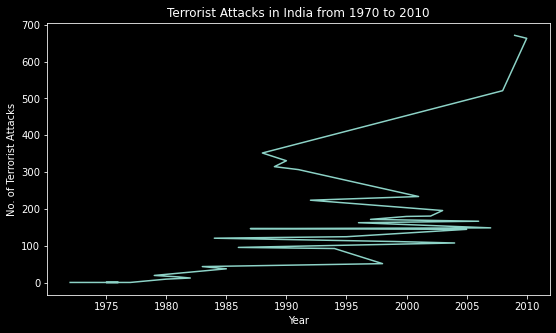

In [19]:
plt.style.use("dark_background")
plt.figure(figsize=(9, 5))
trend1["Year"].value_counts().plot(kind='line')
plt.xlabel("Year")
plt.ylabel('No. of Terrorist Attacks')
plt.title("Terrorist Attacks in India from 1970 to 2010")

Trend of attacks in India from 1970 to 2010 visualised using line graph.

**Q2**

In [20]:
start=india[(pd.DatetimeIndex(india['Date']).year==2010)].index[0]
end=india[(pd.DatetimeIndex(india['Date']).year==2017)].index[-1]
india2010=india.iloc[start:end+1,:]
india2010

,Year,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Date
5307,2010,India,Jharkhand,South Asia,Salpatra,23.701401,86.586665,Hostage Taking (Kidnapping),1.0,0.0,Activist: Mintu Ali,"01/07/2010: On Thursday night, in one of two r...",Communist Party of India - Maoist (CPI-Maoist),Violent Political Party,Firearms,2010-01-07
5308,2010,India,West Bengal,South Asia,Murabani,22.569164,86.973671,Hostage Taking (Kidnapping),1.0,0.0,"Communist Party of India-Marxist activist, Nir...","01/07/2010: On Thursday night, in one of two r...",Communist Party of India - Maoist (CPI-Maoist),Terrorists/Non-State Militia,Firearms,2010-01-07
5309,2010,India,Jharkhand,South Asia,Gumla,23.041512,84.544486,Bombing/Explosion,7.0,0.0,Police,"01/15/2010: On Friday, in Gumla, Jharkhand, In...",Communist Party of India - Maoist (CPI-Maoist),Police,Explosives,2010-01-15
5310,2010,India,Jharkhand,South Asia,Gumla district,23.041512,84.544486,Armed Assault,7.0,2.0,Police,"01/15/2010: On Friday, six policemen and a tru...",Communist Party of India - Maoist (CPI-Maoist),Police,Firearms,2010-01-15
5311,2010,India,Bihar,South Asia,Gaya,24.781467,84.986412,Bombing/Explosion,0.0,0.0,The target was an Airtel cell phone tower.,"01/17/2010: On Sunday evening at 2100, in Gaya...",Communist Party of India - Maoist (CPI-Maoist),Telecommunication,Explosives,2010-01-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11580,2017,India,Kerala,South Asia,Koothuparamba,11.831902,75.565432,Bombing/Explosion,0.0,0.0,Koothuparamba Police Station,12/30/2017: Assailants threw an explosive devi...,Unknown,Police,Explosives,2017-12-30
11581,2017,India,Chhattisgarh,South Asia,Toylanka,18.802725,81.497666,Facility/Infrastructure Attack,0.0,0.0,Road Construction Site,12/30/2017: Assailants set fire to seven vehic...,Communist Party of India - Maoist (CPI-Maoist),Business,Firearms,2017-12-30
11582,2017,India,Jammu and Kashmir,South Asia,Lethapora,33.966527,74.964225,Armed Assault,8.0,3.0,Camp,12/31/2017: Assailants armed with grenades and...,Jaish-e-Mohammad (JeM),Police,Explosives,2017-12-31
11583,2017,India,Assam,South Asia,Hungrum,25.180162,93.015788,Hostage Taking (Kidnapping),0.0,0.0,Personal Security Officer of Council Member Ih...,12/31/2017: Assailants abducted Prafulla Phuka...,Zeliangrong United Front,Government (General),Firearms,2017-12-31


Attacks in India between 2010 and 2017.

In [21]:
usa=terror[terror['Country']=='United States']
usa=usa.reset_index()
usa=usa.drop(columns=['index'])

In [22]:
start=usa[(pd.DatetimeIndex(usa['Date']).year==2010)].index[0]
end=usa[(pd.DatetimeIndex(usa['Date']).year==2017)].index[-1]
usa2010=usa.iloc[start:end+1,:]
usa2010

,Year,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Date
2530,2010,United States,Florida,North America,Clearwater,27.965600,-82.799764,Facility/Infrastructure Attack,0.0,0.0,Restaurants,"02/17/2010: On Wednesday afternoon, in Clearwa...",Unknown,Business,Chemical,2010-02-17
2531,2010,United States,Texas,North America,Austin,30.283581,-97.698654,Facility/Infrastructure Attack,2.0,15.0,The target was the Internal Revenue Service bu...,"02/18/2010: On Thursday, in Austin, Texas, Uni...",Anti-Government extremists,Government (General),Vehicle (not to include vehicle-borne explosiv...,2010-02-18
2532,2010,United States,New York,North America,New York City,40.697132,-73.931351,Bombing/Explosion,0.0,0.0,The targets were private citizens.,"02/25/2010: On Thursday, at the train station ...",Unknown,Transportation,Explosives,2010-02-25
2533,2010,United States,Virginia,North America,Arlington,38.878742,-77.100006,Armed Assault,1.0,2.0,Pentagon Building,"3/4/2010: At roughly 6:40 p.m., John Patrick B...",Anti-Government extremists,Government (General),Firearms,2010-03-04
2534,2010,United States,Colorado,North America,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,A sheepskin factory,"04/30/2010: On Friday night at 0315, in Denver...",Animal Liberation Front (ALF),Business,Incendiary,2010-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2017,United States,North Carolina,North America,Vale,35.630842,-81.439250,Facility/Infrastructure Attack,0.0,0.0,Church,11/13/2017: Assailants set fire to the Provide...,Pro-LGBT Rights extremists,Religious Figures/Institutions,Incendiary,2017-11-13
2789,2017,United States,New Mexico,North America,Aztec,36.820666,-107.990818,Armed Assault,3.0,0.0,School,"12/07/2017: An assailant, identified as Willia...",White extremists,Educational Institution,Firearms,2017-12-07
2790,2017,United States,New York,North America,New York City,40.697132,-73.931351,Bombing/Explosion,0.0,4.0,Bus Terminal,12/11/2017: A suicide bomber detonated explosi...,Jihadi-inspired extremists,Transportation,Explosives,2017-12-11
2791,2017,United States,Pennsylvania,North America,Harrisburg,40.262772,-76.881107,Armed Assault,0.0,0.0,Vehicle,12/22/2017: An assailant opened fire on a Penn...,Unknown,Police,Firearms,2017-12-22


Attacks in USA between 2010 and 2017.

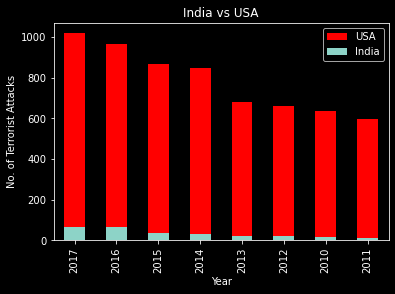

In [23]:
india2010['Year'].value_counts().plot(kind='bar',color='r')
usa2010['Year'].value_counts().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel('No. of Terrorist Attacks')
plt.title("India vs USA")
plt.legend(labels = ['USA','India'], loc = 'upper right')

Comparison of terrorist activity in India and USA from 2010 to 2017 visualised using bar graph.

**Q3**

In [24]:
start=terror[(pd.DatetimeIndex(terror['Date']).year==2000)].index[0]
end=terror[(pd.DatetimeIndex(terror['Date']).year==2007)].index[-1]
trend2=terror.iloc[start:end+1,:]
trend2

,Year,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Date
62726,2000,Namibia,Kavango,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,Armed Assault,0.0,7.0,A tavern in Muitjiku,01/01/2000: In the first of two related incide...,National Union for the Total Independence of A...,Business,Firearms,2000-01-01
62727,2000,Namibia,Kavango,Sub-Saharan Africa,Muitjiku,-17.910812,19.988303,Hostage Taking (Kidnapping),0.0,7.0,The Bush Babies nightclub in Muitjiku,01/01/2000: In the second of two related incid...,National Union for the Total Independence of A...,Business,Firearms,2000-01-01
62728,2000,India,Jammu and Kashmir,South Asia,Udhampur,32.925224,75.135264,Armed Assault,1.0,2.0,The Central Reserve Police Force 68 battalion ...,01/01/2000: Members of Lashkar-e Taiba attacke...,Lashkar-e-Taiba (LeT),Police,Firearms,2000-01-01
62729,2000,Kosovo,Kosovo (Province),Eastern Europe,Peje,42.659809,20.307119,Bombing/Explosion,0.0,1.0,"A Romany (gypsy) home in Pec, Kosovo","01/01/2000: A Romany (gypsy) house in Pec, Kos...",Unknown,Private Citizens & Property,Explosives,2000-01-01
62730,2000,Somalia,Banaadir,Sub-Saharan Africa,Mogadishu,2.059819,45.326115,Armed Assault,6.0,10.0,Milk traders traveling from Mogadishu,01/01/2000: Over six people were killed and te...,Unknown,Private Citizens & Property,Firearms,2000-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78303,2008,Thailand,Yala (Province),Southeast Asia,Unknown,6.545499,101.279900,Bombing/Explosion,0.0,37.0,Civilians shopping at a morning market,01/14/2008: A remotely detonated bomb explode...,Unknown,Private Citizens & Property,Explosives,2008-01-14
78304,2008,Thailand,Narathiwat (Province),Southeast Asia,Chanae district,6.057088,101.695444,Bombing/Explosion,8.0,0.0,Thai soldiers' Humvee,01/14/2008: About 20 separatist rebels killed...,Unknown,Military,Explosives,2008-01-14
78305,2008,Iraq,Baghdad,Middle East & North Africa,Baghdad,33.303566,44.371773,Armed Assault,1.0,0.0,Professionals from Saadam's Sunni-lead regime,"01/14/2008: Judge Amir Jawdat al-Naeeb, a Sun...",Unknown,Government (General),Firearms,2008-01-14
78306,2008,Lebanon,Beirut,Middle East & North Africa,Beirut,33.888523,35.503513,Bombing/Explosion,3.0,0.0,US Embassy vehicle and near-by bystanders,01/14/2008: A bomb hidden on a north Beirut h...,Unknown,Government (Diplomatic),Explosives,2008-01-14


Attacks in all the countries between 2000 and 2007.

In [25]:
ind=trend2[trend2.Country=='India'].value_counts().sum()
pak=trend2[trend2.Country=='Pakistan'].value_counts().sum()
us=trend2[trend2.Country=='United States'].value_counts().sum()
afg=trend2[trend2.Country=='Afghanistan'].value_counts().sum()
serb=trend2[trend2.Country=='Serbia'].value_counts().sum()

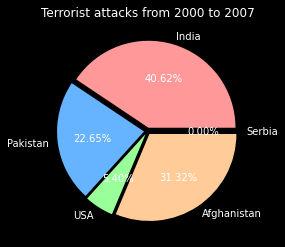

In [26]:
plt.pie([ind,pak,us,afg,serb] , explode=[0.04]*5  , labels = ['India','Pakistan','USA','Afghanistan','Serbia'] , autopct='%1.2f%%',colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#ffbc49'])
plt.title('Terrorist attacks from 2000 to 2007')
plt.show()

Most frequently attacked country among India, Pakistan, United States, Afghanistan and Serbia between 2000 and 2007 using Pie chart.